<a href="https://colab.research.google.com/github/GustavoG0mes/MVP1/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

Nome: Gustavo Gomes de Mendonça

Matrícula: 4052025000733

Dataset: Ifood (https://github.com/GustavoG0mes/MVP1)

## Descrição do Problema

O conjunto de dados Ifood é um conjunto de dados real utilizado em processo seletivo da empresa que consiste em análise de dados e construir um modelo preditivo que produza o maior lucro para o próxima campanha de marketing direto, sendo assim é necessário realizar o entendimento da base e tratamento dos dados. O conjunto de dados contém recursos sociodemográficos e firmográficos sobre 2.240 clientes que foram contatados. Além disso, contém um rótulo para aqueles clientes que responderam à campanha, comprando o produto. Os principais desafios são explorar os dados e realizar uma classificação dos clientes.
Sendo assim, para esse projeto será realizado desde a definição do problema até a etapa de pré-processamento de dados da base de dados.

## Hipóteses do Problema

*As hipóteses que tracei são as seguintes:*

- O cliente possuir dependentes intefere na quantidade de produtos que ele consome?

- Existe uma correlação entre nível de escolaridade e adesão em campanhas?

- A idade interfere no consumo?

*Tipo de Problema*

Este é um problema de classificação supervisionada. Dado um conjunto de características dos clientes (incluindo dados demográficos como se possuem filhos, se são casados, grau de educação, renda; dados de consumo como itens consumidos; e outros dados de cliente), o objetivo é prever se um determinado cliente irá aderir a uma campanha proposta pelo Ifood.

*Seleção de Dados*

O dataset Ifood é um conjunto de dados disponível e foi utilizado em um processo seletivo da empresa, podendo ser usado para análise dados e até mesmo para construção de um modelo de aprendizado de máquina. O dataset está disponível no github.



# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Ifood.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Carregamento do dataset em um DF do pandas
url = 'https://raw.githubusercontent.com/GustavoG0mes/MVP1/main/base_ifood.csv'
df = pd.read_csv(url)

In [ ]:
# Visualizando as primeiras linhas do DF
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Dicionário de dados, mostrando as colunas, tipos de dados e um panorama geral de nulos.
dicionario = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': df.dtypes.values,
    'Valores Nulos': df.isnull().sum().values,
    'Valores Não Nulos': df.notnull().sum().values,
    'Porcentagem de Nulos (%)': (df.isnull().sum() / len(df) * 100).round(2).values
})

display(dicionario)

Coluna Tipo de Dado  Valores Nulos  Valores Não Nulos  \
0                    ID        int64              0               2240   
1            Year_Birth        int64              0               2240   
2             Education       object              0               2240   
3        Marital_Status       object              0               2240   
4                Income      float64             24               2216   
5               Kidhome        int64              0               2240   
6              Teenhome        int64              0               2240   
7           Dt_Customer       object              0               2240   
8               Recency        int64              0               2240   
9              MntWines        int64              0               2240   
10            MntFruits        int64              0               2240   
11      MntMeatProducts        int64              0               2240   
12      MntFishProducts        int64              0               2240   
13     MntSweetProducts        int64              0               2240   
14         MntGoldProds        int64              0               2240   
15    NumDealsPurchases        int64              0               2240   
16      NumWebPurchases        int64              0               2240   
17  NumCatalogPurchases        int64              0               2240   
18    NumStorePurchases        int64              0               2240   
19    NumWebVisitsMonth        int64              0               2240   
20         AcceptedCmp3        int64              0               2240   
21         AcceptedCmp4        int64              0               2240   
22         AcceptedCmp5        int64              0               2240   
23         AcceptedCmp1        int64              0               2240   
24         AcceptedCmp2        int64              0               2240   
25             Complain        int64              0               2240   
26        Z_CostContact        int64              0               2240   
27            Z_Revenue        int64              0               2240   
28             Response        int64              0               2240   

    Porcentagem de Nulos (%)  
0                       0.00  
1                       0.00  
2                       0.00  
3                       0.00  
4                       1.07  
5                       0.00  
6                       0.00  
7                       0.00  
8                       0.00  
9                       0.00  
10                      0.00  
11                      0.00  
12                      0.00  
13                      0.00  
14                      0.00  
15                      0.00  
16                      0.00  
17                      0.00  
18                      0.00  
19                      0.00  
20                      0.00  
21                      0.00  
22                      0.00  
23                      0.00  
24                      0.00  
25                      0.00  
26                      0.00  
27                      0.00  
28                      0.00

## Análise de dados

Nesta etapa de Análise Exploratória dos Dados (EDA) aplicada ao dataset do iFood, o objetivo é obter uma compreensão inicial sobre a distribuição das variáveis, identificar padrões, possíveis correlações e comportamentos relevantes nos dados. Essa análise é fundamental para orientar as próximas fases do trabalho, como o pré-processamento e a modelagem, garantindo decisões mais embasadas ao longo do processo.

O conjunto de dados analisado possui **2.240 registros** e **29 variáveis**, contendo informações de perfil demográfico, comportamento de compra e engajamento dos clientes com a campanha de marketing do iFood. A seguir, destacam-se alguns pontos relevantes:

### 1. Tipos de Dados
- O dataset é composto majoritariamente por variáveis numéricas do tipo `int64`, totalizando **25 colunas**.
- Há uma única variável do tipo `float64` (`Income`), representando a renda anual dos clientes.
- Três colunas possuem dados categóricos (`object`): `Education`, `Marital_Status` e `Dt_Customer`.

### 2. Completude dos Dados
- A maioria das variáveis está completa (sem valores ausentes), com exceção da variável `Income`, que possui **24 valores ausentes** (2.240 - 2.216).
- As demais colunas apresentam **100% de preenchimento**.


### 4. Potencial de Análise
- O dataset oferece boas oportunidades para **segmentação de clientes**, análise de **comportamento de consumo** e identificação de **padrões associados à resposta à campanha de marketing**.
- As variáveis numéricas permitem aplicar análises estatísticas, visualizações gráficas e algoritmos de machine learning.
- As variáveis categóricas podem ser usadas para comparar perfis de clientes e explorar diferenças entre grupos.

In [ ]:
# Verificação das colunas númericas
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):

    display((df.describe()))

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [ ]:
# Verificação das colunas não númericas
df.describe(exclude="number")

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12


### Dicionário de dados

Dados pessoais

- `ID`: Identificador único do cliente
- `Year_Birth`: Ano de nascimento do cliente
- `Education`: Nível de educação do cliente
- `Marital_Status`: Estado civil do cliente
- `Income`: Renda anual da família do cliente
- `Kidhome`: Número de crianças na casa do cliente
- `Teenhome`: Número de adolescentes na casa do cliente
- `Dt_Customer`: Data de inscrição do cliente na empresa
- `Recency`: Número de dias desde a última compra do cliente
- `Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

Dados de produtos

- `MntWines`: Valor gasto em vinho nos últimos 2 anos
- `MntFruits`: Valor gasto em frutas nos últimos 2 anos
- `MntMeatProducts`: Valor gasto em carne nos últimos 2 anosw
- `MntFishProducts`: Valor gasto em peixe nos últimos 2 anos
- `MntSweetProducts`: Valor gasto em doces nos últimos 2 anos
- `MntGoldProds`: Valor gasto em produtos *gold* nos últimos 2 anos

Dados de campanha

- `NumDealsPurchases`: Número de compras feitas com desconto
- `AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- `AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- `AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- `AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- `AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- `Response`: 1 se o cliente aceitou a oferta na última campanha (piloto), 0 caso contrário (*target*)

Dados de local de compra

- `NumWebPurchases`: Número de compras feitas através do site da empresa
- `NumCatalogPurchases`: Número de compras feitas usando um catálogo
- `NumStorePurchases`: Número de compras feitas diretamente nas lojas
- `NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês

## Algumas observações

Podemos perceber que temos pouquissimas linhas com dados números, somente na coluna `Income` e representando somente 1,07% dos dados, como é um número pequeno podemos realizar a retirada dessas linhas.

A coluna `Dt_Customer` está como object, teremos que realizar a transformação para tipo Data.

In [ ]:
# Remove apenas as linhas onde a coluna 'Income' está nula
df = df[df['Income'].notna()]

# Converte a coluna 'Dt_Customer' para datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%Y-%m-%d")

# Exibe as primeiras linhas
df.head()

/tmp/ipython-input-7-1078423467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%Y-%m-%d")


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Confirmando se as linhas nulas foram excluídas e o tipo da coluna de data foi alterada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [ ]:
datas = df['Dt_Customer']

# Calcular estatísticas
datas_analise = {
    'Linhas': datas.count(),
    'Média': datas.mean(),
    'Desvio Padrão': datas.std(),
    'min': datas.min(),
    '25%': datas.quantile(0.25),
    '50%': datas.median(),
    '75%': datas.quantile(0.75),
    'max': datas.max()
}

display(pd.DataFrame(datas_analise, index=['Dt_Customer']).T)

Dt_Customer
Linhas                                  2216
Média          2013-07-10 11:29:27.509025280
Desvio Padrão    202 days 10:25:55.267301594
min                      2012-07-30 00:00:00
25%                      2013-01-16 00:00:00
50%                      2013-07-08 12:00:00
75%                      2013-12-31 00:00:00
max                      2014-06-29 00:00:00

Podemos confirmar que as linhas em branco foram deletadas e a coluna de datas foi alterada, também conseguimos verificar que os dados disponíveis indicam que a maior parte dos cadastros ocorreu entre meados de 2012 e meados de 2014, com concentração maior dentro do ano de 2013. A variação temporal de cerca de 6-7 meses ao redor da média mostra uma dispersão moderada, sem grandes picos ou lacunas evidentes no período analisado.

### Criação e tranformação de Colunas

Nessa etapa vamos criar e transformar colunas para facilitar a análise e possível classificação de clientes no futuro, como o dateset foi recebido em inglês, as colunas manterão o mesmo padrão.

In [ ]:
# Adição da coluna que representa o tempo em dias desde o momento em que os clientes foram cadastrados na empresa, a criação dessa coluna visa a possibilidade do campo em uma utilização em um modelo.
df["DaysSinceEnrolled"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["DaysSinceEnrolled"] = df["DaysSinceEnrolled"].dt.days

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  DaysSinceEnrolled  
0         11         1                663  
1         11         0                113  
2         11         0                312  
3         11         0                139  
4         11         0                161  

[5 rows x 30 columns]

In [ ]:
# Criação da coluna ano,converte a quantidade de dias desde que alguém se matriculou/inscreveu em um número de anos completos desde a matrícula/inscrição
df["YearSinceEnrolled"] = df["DaysSinceEnrolled"] // 365

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   DaysSinceEnrolled  YearSinceEnrolled  
0                663                  1  
1                113                  0  
2                312                  0  
3                139                  0  
4                161                  0  

[5 rows x 31 columns]

In [ ]:
df["YearSinceEnrolled"].value_counts()

YearSinceEnrolled
0    1144
1    1072
Name: count, dtype: int64

Podemos analisar que a base está divida entre metade com menos de um ano como cliente e a outra metade com mais de um ano.

In [ ]:
# Criando a coluna com idade do cliente, considerando que a base foi feita em 2014, visto que é de quando os dados foram disponibilizados.
df["Age"] = df["Dt_Customer"].max().year - df["Year_Birth"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11         1   
1             0         0              3         11         0   
2             0         0              3         11         0   
3             0         0              3         11         0   
4             0         0              3         11         0   

   DaysSinceEnrolled  YearSinceEnrolled  Age  
0                663                  1   57  
1                113                  0   60  
2                312                  0   49  
3                139                  0   30  
4                161                  0   33  

[5 rows x 32 columns]

In [ ]:
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Podemos verificar que metade da nossa base está em trono de 40 anos de idade, o mínimo é 18 e o máximo é 121 (terei que verificar possíveis outliers).

Vamos criar um grupo de idade para facilitar a análise.

- adulto_jovem: 18-30

- adulto: 31-45

- adulto_senior: 46-60

- idoso: 61-max

In [ ]:
# Criação dos grupos utilizando o Cut.
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18,30,45,60,df["Age"].max()],
    labels=["18-39","31-45","46-60","61+"],
    include_lowest=True,
)

In [ ]:
# Verificando se a divisão de grupos está correta
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysSinceEnrolled  YearSinceEnrolled  \
0              3         11         1                663                  1   
1              3         11         0                113                  0   
2              3         11         0                312                  0   
3              3         11         0                139                  0   
4              3         11         0                161                  0   

   Age  AgeGroup  
0   57     46-60  
1   60     46-60  
2   49     46-60  
3   30     18-39  
4   33     31-45  

[5 rows x 33 columns]

In [ ]:
# Verificação dos grupos criados
df["AgeGroup"].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-39    257
Name: count, dtype: int64

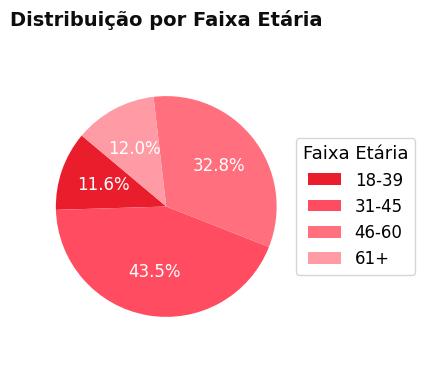

In [ ]:
# Contagem por faixa etária
age_counts = df["AgeGroup"].value_counts().sort_index()

# Paleta iFood
colors = ['#EA1D2C', '#FF4C61', '#FF6F7D', '#FF9BA5']

# Cria o gráfico
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    age_counts,
    colors=colors[:len(age_counts)],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'color': 'white'}
)

# Adiciona a legenda
ax.legend(
    wedges,
    age_counts.index,
    title="Faixa Etária",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    title_fontsize=13
)

# Título
plt.title('Distribuição por Faixa Etária', fontsize=14, fontweight='bold', color="#0E0D0D", ha='center')
plt.axis('equal')  # círculo proporcional
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


Podemos identificar que a maioria dos clientes estão nas faixas 31-45 (43%) e 46-60 (32%).

Na base de dados possuimos 5 grandes categorias: vinhos, carnes, frutas exóticas, peixes especialmente preparados e produtos doces. Estes podem ser divididos ainda mais em produtos *gold* e regulares.

In [ ]:
# Verificando as colunas que começam com 'Mnt' que são as colunas citadas acima de produtos
df.columns[df.columns.str.startswith("Mnt")]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [ ]:
df.loc[:,df.columns.str.startswith("Mnt")]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2216 rows x 6 columns]

In [ ]:
# Criando uma coluna com a soma total sem a distinção entre produtos regulares ou gold.
df["MntTotal"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)

# Criando uma coluna com a soma total dos produtos regulares.
df["MntRegularProds"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"]
)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  DaysSinceEnrolled  YearSinceEnrolled  Age  AgeGroup  MntTotal  \
0         1                663                  1   57     46-60      1617   
1         0                113                  0   60     46-60        27   
2         0                312                  0   49     46-60       776   
3         0                139                  0   30     18-39        53   
4         0                161                  0   33     31-45       422   

   MntRegularProds  
0             1529  
1               21  
2              734  
3               48  
4              407  

[5 rows x 35 columns]

No DF temos duas colunas referente a crianças e adolescentes, sendo assim acredito que seja melhor fazer somente uma coluna com a soma dos dados, considerando assim essa coluna pessoas menores de idade na residencia.

In [ ]:
# Criando a coluna de soma de dependentes
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Criando uma coluna de flag se o cliente possui dependentes ou não (utilizando o binário 0 ou 1)
df["HasChildren"] = df["Children"].apply(lambda x: 1 if x > 0 else 0)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  DaysSinceEnrolled  \
0  2012-09-04       58       635  ...         11         1                663   
1  2014-03-08       38        11  ...         11         0                113   
2  2013-08-21       26       426  ...         11         0                312   
3  2014-02-10       26        11  ...         11         0                139   
4  2014-01-19       94       173  ...         11         0                161   

   YearSinceEnrolled  Age  AgeGroup  MntTotal  MntRegularProds  Children  \
0                  1   57     46-60      1617             1529         0   
1                  0   60     46-60        27               21         2   
2                  0   49     46-60       776              734         0   
3                  0   30     18-39        53               48         1   
4                  0   33     31-45       422              407         1   

   HasChildren  
0            0  
1            1  
2            0  
3            1  
4            1  

[5 rows x 37 columns]

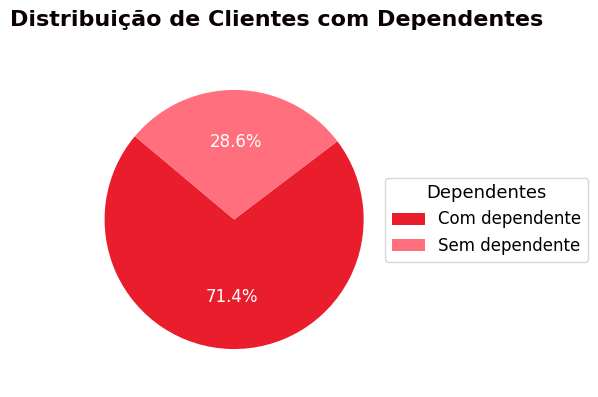

In [ ]:
# Mapeando os valores para melhor leitura
legenda = {1: 'Com dependente', 0: 'Sem dependente'}
conta = df["HasChildren"].map(legenda).value_counts()

# Paleta iFood
colors = ['#EA1D2C', '#FF6F7D']

# Criar gráfico
fig, ax = plt.subplots(figsize=(4, 4))  # Aumentado para dar espaço à legenda
wedges, texts, autotexts = ax.pie(
    conta,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'color': 'white'}
)

# Adiciona legenda
ax.legend(
    wedges,
    conta.index,
    title="Dependentes",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    title_fontsize=13
)

# Título centralizado
plt.suptitle(
    'Distribuição de Clientes com Dependentes',
    fontsize=16,
    fontweight='bold',
    color="#0C0102",
    ha='center'
)

plt.axis('equal')
plt.tight_layout()
plt.subplots_adjust(right=0.75)
plt.show()


Podemos identificar que 71% dos clientes possuem algum dependente.

Ao analisar a coluna `Marital_Status` que é o status civil do cliente, é possível verificar que essa coluna possui 8 dados diferentes, sendo assim podemos realizar a alteração de alguns.

In [ ]:
# Alteração da coluna para somente dois status de relacionamento
df["Marital_Status"] = df["Marital_Status"].replace({
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single",
    "Together": "Partner",
    "Married": "Partner",
    "Widow": "Single",
    "Single": "Single",
    "Divorced": "Single",
})


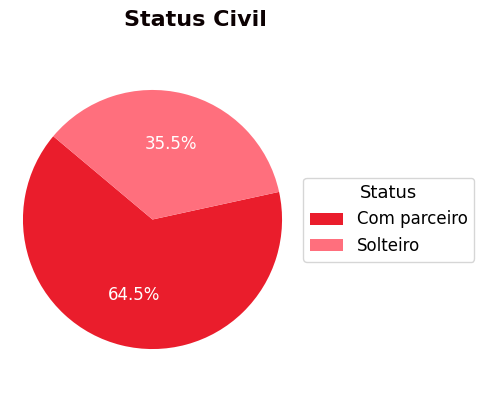

In [ ]:
# Mapeando os valores
legenda = {"Single": 'Solteiro', "Partner": 'Com parceiro'}
conta = df["Marital_Status"].map(legenda).value_counts()

# Paleta iFood
colors = ['#EA1D2C', '#FF6F7D']

# Criar gráfico
fig, ax = plt.subplots(figsize=(4, 4))  # Aumentado para dar espaço à legenda
wedges, texts, autotexts = ax.pie(
    conta,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'color': 'white'}
)

# Adiciona legenda
ax.legend(
    wedges,
    conta.index,
    title="Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    title_fontsize=13
)

# Título centralizado
plt.suptitle(
    'Status Civil',
    fontsize=16,
    fontweight='bold',
    color="#0C0102",
    ha='center'
)

plt.axis('equal')
plt.tight_layout()
plt.subplots_adjust(right=0.75)
plt.show()


65% dos clientes tem algum tipo de parceiro e 35% estão solteiros.

In [ ]:
# Verificando a coluna sobre Educação
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

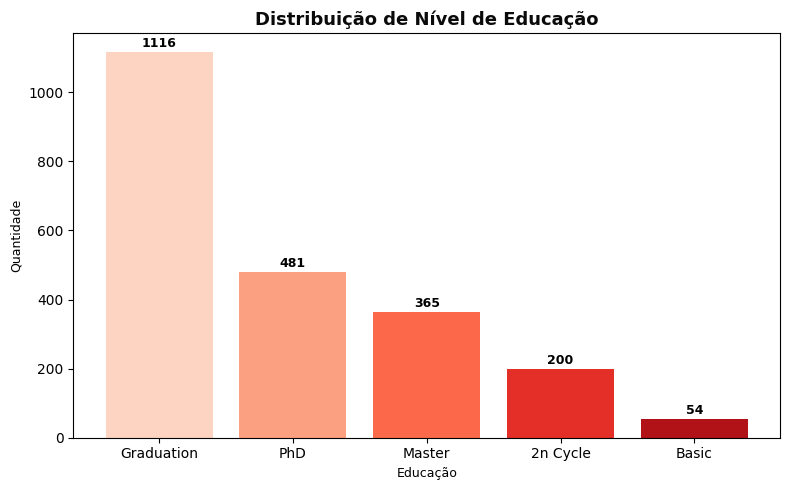

In [ ]:
# Contagem dos valores
edu_counts = df["Education"].value_counts()

# Paleta com tons de vermelho (estilo iFood)
colors = sns.color_palette("Reds", len(edu_counts))

# Criando o gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(edu_counts.index, edu_counts.values, color=colors)

# Adicionando os valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Título e rótulos
plt.title('Distribuição de Nível de Educação', fontsize=13, fontweight='bold', color="#0A0A0A")
plt.xlabel('Educação', fontsize=9)
plt.ylabel('Quantidade', fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Percebe-se que pessoas que tendem a ter um nível de gradução superior consumem mais produtos.

### Campos relacionados a campanhas

In [ ]:
# Verificando as colunas que começam com 'Accept' que são as colunas relacionadas a aceitação de campanhas
df.columns[df.columns.str.startswith("Accept")]

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

In [ ]:
# Criação de uma nova coluna com o total das campanhas
df["AcceptedCmpTotal"] = (
    df["AcceptedCmp1"] +
    df["AcceptedCmp2"] +
    df["AcceptedCmp3"] +
    df["AcceptedCmp4"] +
    df["AcceptedCmp5"]
)

# Criação de uma coluna se o cliente já aceitou alguma campanha de market ou não
df["HasAcceptedCmp"] = df["AcceptedCmpTotal"].apply(lambda x:1 if x > 0 else 0)



In [ ]:
# Geração de uma função de gráfico de pizza para análise
def grafico_de_pizza(df, coluna, titulo='Gráfico de Pizza', cores=None):
    """
    Gera um gráfico de pizza para qualquer coluna categórica de um DataFrame.

    Parâmetros:
    - df: DataFrame do pandas
    - coluna: nome da coluna (string)
    - titulo: título do gráfico (string)
    - cores: lista de cores para os pedaços (opcional)
    """

    # Contagem dos valores
    contagem = df[coluna].value_counts()

    # Gerar cores padrão se não for informado
    if cores is None:
        cores = plt.cm.Reds_r(range(50, 50 + len(contagem)*20, 20))

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(4, 4))
    wedges, texts, autotexts = ax.pie(
        contagem,
        labels=None,
        colors=cores,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 12, 'color': 'white'}
    )

    # Legenda com rótulo e quantidade
    legenda = [f"{label} ({valor})" for label, valor in zip(contagem.index, contagem.values)]

    ax.legend(
        wedges,
        legenda,
        title=coluna,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=11,
        title_fontsize=12
    )

    # Título centralizado
    plt.suptitle(
        titulo,
        fontsize=16,
        fontweight='bold',
        color="#0C0102",
        ha='center'
    )

    plt.axis('equal')  # Formato circular
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)
    plt.show()

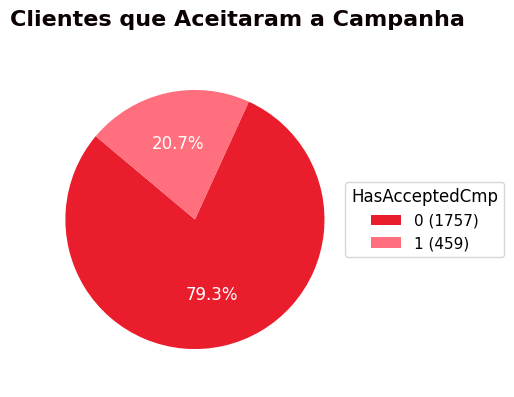

In [ ]:
cores_ifood = ['#EA1D2C', '#FF6F7D']

grafico_de_pizza(
    df,
    coluna="HasAcceptedCmp",
    titulo="Clientes que Aceitaram a Campanha",
    cores=cores_ifood
)


Conseguimos analisar que em 5 campanhas somente 20% da base de clientes aceitaram alguma campanha, sendo um indice de penetração muito baixo.

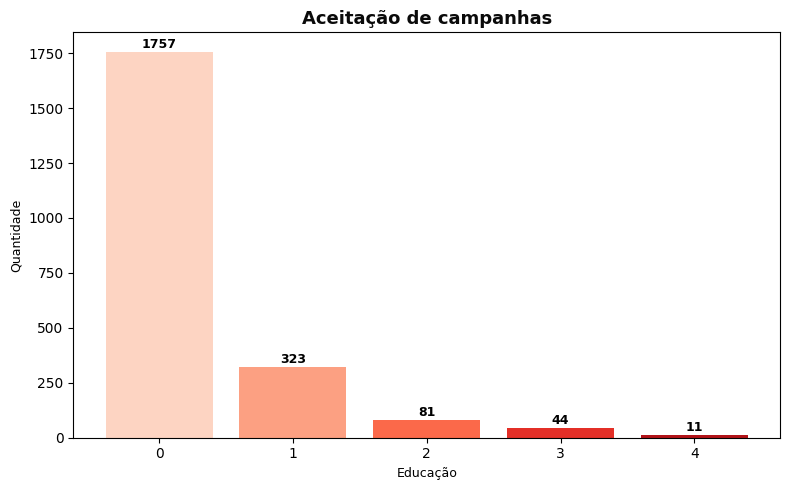

In [ ]:
# Contagem dos valores
edu_counts = df["AcceptedCmpTotal"].value_counts()

# Paleta com tons de vermelho (estilo iFood)
colors = sns.color_palette("Reds", len(edu_counts))

# Criando o gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(edu_counts.index, edu_counts.values, color=colors)

# Adicionando os valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Título e rótulos
plt.title('Aceitação de campanhas', fontsize=13, fontweight='bold', color="#0A0A0A")
plt.xlabel('Educação', fontsize=9)
plt.ylabel('Quantidade', fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Podemos perceber que nenhum cliente aceitou as 5 campanhas realizadas (provavelmente cada campanha tinha um objetivo diferente para públicos diferentes) e que a grande maioria dos que aceitaram alguma campanha, somente aceitaram uma.

### Verificando as colunas relacionadas ao números de vendas

In [ ]:
# Verificando as colunas que começam com 'Num'
df.columns[df.columns.str.startswith("Num")]

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Podemos juntar as seguintes colunas, formando um número total de vendas:

- `NumWebPurchases`: Número de compras feitas através do site da empresa
- `NumCatalogPurchases`: Número de compras feitas usando um catálogo
- `NumStorePurchases`: Número de compras feitas diretamente nas lojas

In [ ]:
# Juntando as colunas relacionadas a vendas
df["NumTotalPurchases"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

df["NumTotalPurchases"].value_counts()

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
16     98
14     98
17     88
21     85
20     85
19     85
15     83
11     77
22     75
13     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
0       6
29      6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

## Verificação de Outliers

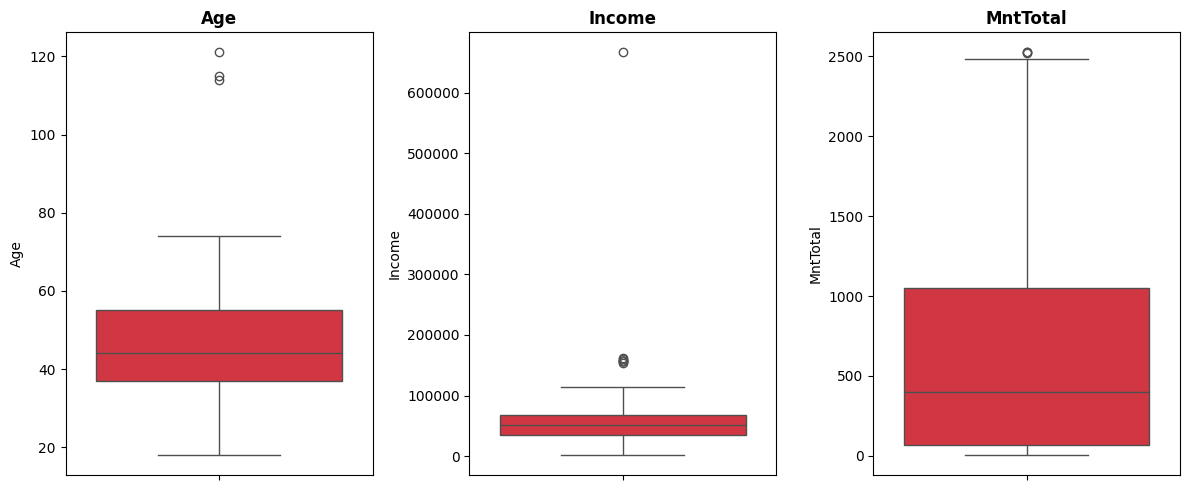

In [ ]:
# Colunas que serão utilizadas
search_outliers = ["Age", "Income", "MntTotal"]

# Core vermelha (iFood)
cor_vermelha = "#EA1D2C"

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i], color=cor_vermelha)
    axs[i].set_title(column, fontsize=12, fontweight="bold")

plt.show()

Podemos perceber ao observar os gráficos que nos dois primeiros temos outliers que deveremos verificar, já no terceiro gráfico o valor matematicamente seria um outlier, porém na prática ele está muito próximo do limite suporior, sendo assim irei manter.
Será realizado a criação de uma função para que identifique os valores outliers superiores ou inferios para os dois primeiros gráficos.

In [ ]:
# Criação de função para identificação de outliers superiores e inferiores
def inspect_outliers(dataframe, column, whisker_width=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1 # Intervalo interquartil
    lower_bound = q1 - whisker_width * iqr # Limite inferior
    upper_bound = q3 + whisker_width * iqr # Limite superior

    return dataframe[
        (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    ]

In [ ]:
# Verificando os outliers relacionado a idade
inspect_outliers(df,"Age")

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  YearSinceEnrolled  Age  AgeGroup  \
192  2013-09-26       99        15  ...                  0  114       61+   
239  2014-05-17       23         8  ...                  0  121       61+   
339  2013-09-26       36       755  ...                  0  115       61+   

     MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
192        65               40         1            1                 0   
239        22               20         1            1                 0   
339      1853             1629         0            0                 1   

     HasAcceptedCmp  NumTotalPurchases  
192               0                  5  
239               0                  3  
339               1                 14  

[3 rows x 40 columns]

Após análise foram identificados 3 clientes com idade superior a 100 anos, nesse caso optei por desconsiderar e apagar as linhas por ser um volume baixo de dados e o grande risco dessas idades estarem erradas e poderem afetar futuras análises.

In [ ]:
# Retiradas dos clientes acima de 100 anos.
df = df.drop(inspect_outliers(df,"Age").index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-null   i

In [ ]:
# Função de verificação de outliers na coluna Income
inspect_outliers(df,"Income")

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearSinceEnrolled  Age  \
164          1  2014-03-01       98        20  ...                  0   41   
617          1  2013-06-03       31        85  ...                  1   38   
655          0  2014-02-07       81         1  ...                  0   39   
687          0  2012-08-04       21        55  ...                  1   32   
1300         0  2013-06-04       37        39  ...                  1   43   
1653         0  2013-04-29       13         1  ...                  1   37   
2132         0  2013-08-29       85         2  ...                  0   65   
2233         0  2013-06-02       23         9  ...                  1   37   

      AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
164      31-45      1608             1607         1            1   
617      31-45       107              105         2            1   
655      31-45         6                5         0            0   
687      31-45      1717             1713         0            0   
1300     31-45        59               51         1            1   
1653     31-45      1730             1729         0            0   
2132       61+         8                7         0            0   
2233     31-45        62               50         1            1   

      AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
164                  0               0                 22  
617                  0               0                  1  
655                  0               0                  0  
687                  0               0                 29  
1300                 0               0                  2  
1653                 0               0                 28  
2132                 0               0                  0  
2233                 0               0                  7  

[8 rows x 40 columns]

Após rodar a função na coluna Income, percebe-se 8 registros, seguindo a mesma estratégia anterior e tendo um perfil mais conservador vou optar por retirar esses registros.

In [ ]:
# Retirada dos outliers
df = df.drop(inspect_outliers(df,"Income").index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-null   i

In [ ]:
# Verificando os outliers relacionado ao total
inspect_outliers(df,"MntTotal")


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single  90638.0        0         0   
1492  1763        1988  Graduation        Partner  87679.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  YearSinceEnrolled  Age  AgeGroup  \
1179  2014-02-13       29      1156  ...                  0   23     18-39   
1492  2013-07-27       62      1259  ...                  0   26     18-39   
1572  2014-02-13       29      1156  ...                  0   23     18-39   

      MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
1179      2525             2429         0            0                 1   
1492      2524             2491         0            0                 3   
1572      2525             2429         0            0                 1   

      HasAcceptedCmp  NumTotalPurchases  
1179               1                 17  
1492               1                 28  
1572               1                 17  

[3 rows x 40 columns]

Como explicado anteriormente, vou considerar esses três registros como normais por estarem muito próximos do limite superior.

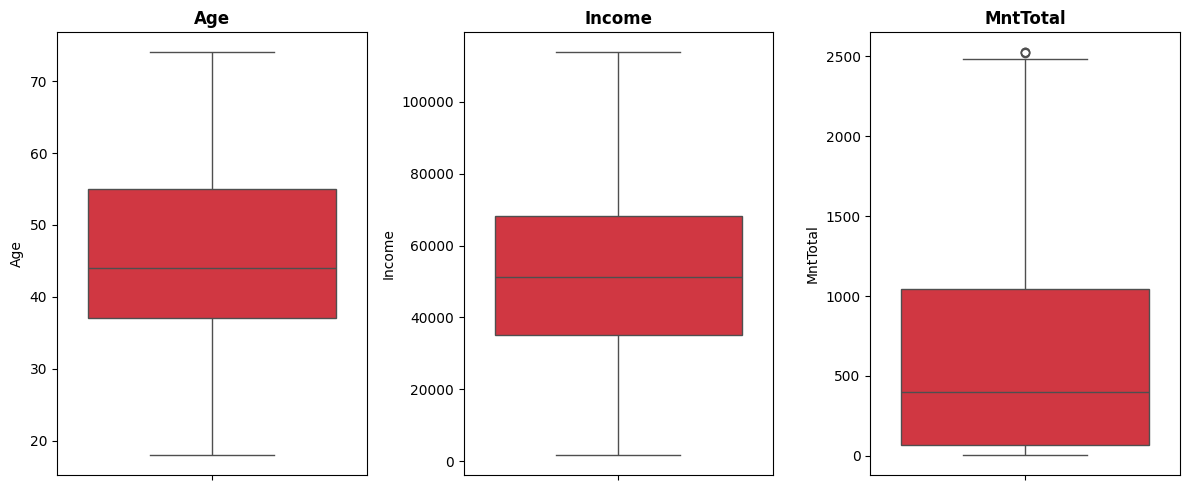

In [ ]:
# Verificando novamente como ficaram os gráficos de outliers após o tratamento
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i], color=cor_vermelha)
    axs[i].set_title(column, fontsize=12, fontweight="bold")

plt.show()

## Eliminando colunas

Nessa etapa vou eliminar algumas colunas que julguei não serem necessárias ou redundantes para o modelo e análises.

In [ ]:
df = df.drop(
    [
        "ID",
        "Year_Birth",
        "Dt_Customer",
        "Z_CostContact",
        "Z_Revenue"
    ],
    axis=1
)

Após o tratamento de dados, a próxima etapa será a visualização de dados para análise exploratória.

In [ ]:
# Verificando os dados das colunas númericas após o tratamento dos dados
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):

    display((df.describe()))

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysSinceEnrolled  YearSinceEnrolled     Age  MntTotal  \
count            2205.00            2205.00 2205.00   2205.00   
mean              353.72               0.48   45.10    606.82   
std               202.56               0.50   11.71    601.68   
min                 0.00               0.00   18.00      5.00   
25%               180.00               0.00   37.00     69.00   
50%               356.00               0.00   44.00    397.00   
75%               529.00               1.00   55.00   1047.00   
max               699.00               1.00   74.00   2525.00   

       MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
count          2205.00   2205.00      2205.00           2205.00   
mean            562.76      0.95         0.72              0.30   
std             575.94

In [ ]:
# Verificando os dados das colunas não númericas após o tratamento dos dados
df.describe(exclude="number")

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation        Partner    31-45
freq          1113           1422      958

É percepitivel que a maioria clientes possuem parceiros, tem gradução e estão na faixa etária entre 31 e 45 anos.

Irei criar uma variavel de colunas que julguei importante para analisar os dados após o tratamento.

In [ ]:
# criação de função para gráfico
def pairplot(dataframe, columns, hue_column=None, alpha=0.5,corner=True):
    analysis= columns.copy() + [hue_column]
    sns.pairplot(
    dataframe[analysis],
    diag_kind="kde",
    hue=hue_column,
    plot_kws = dict(alpha=alpha),
    corner=corner,
    palette="Set2"
);

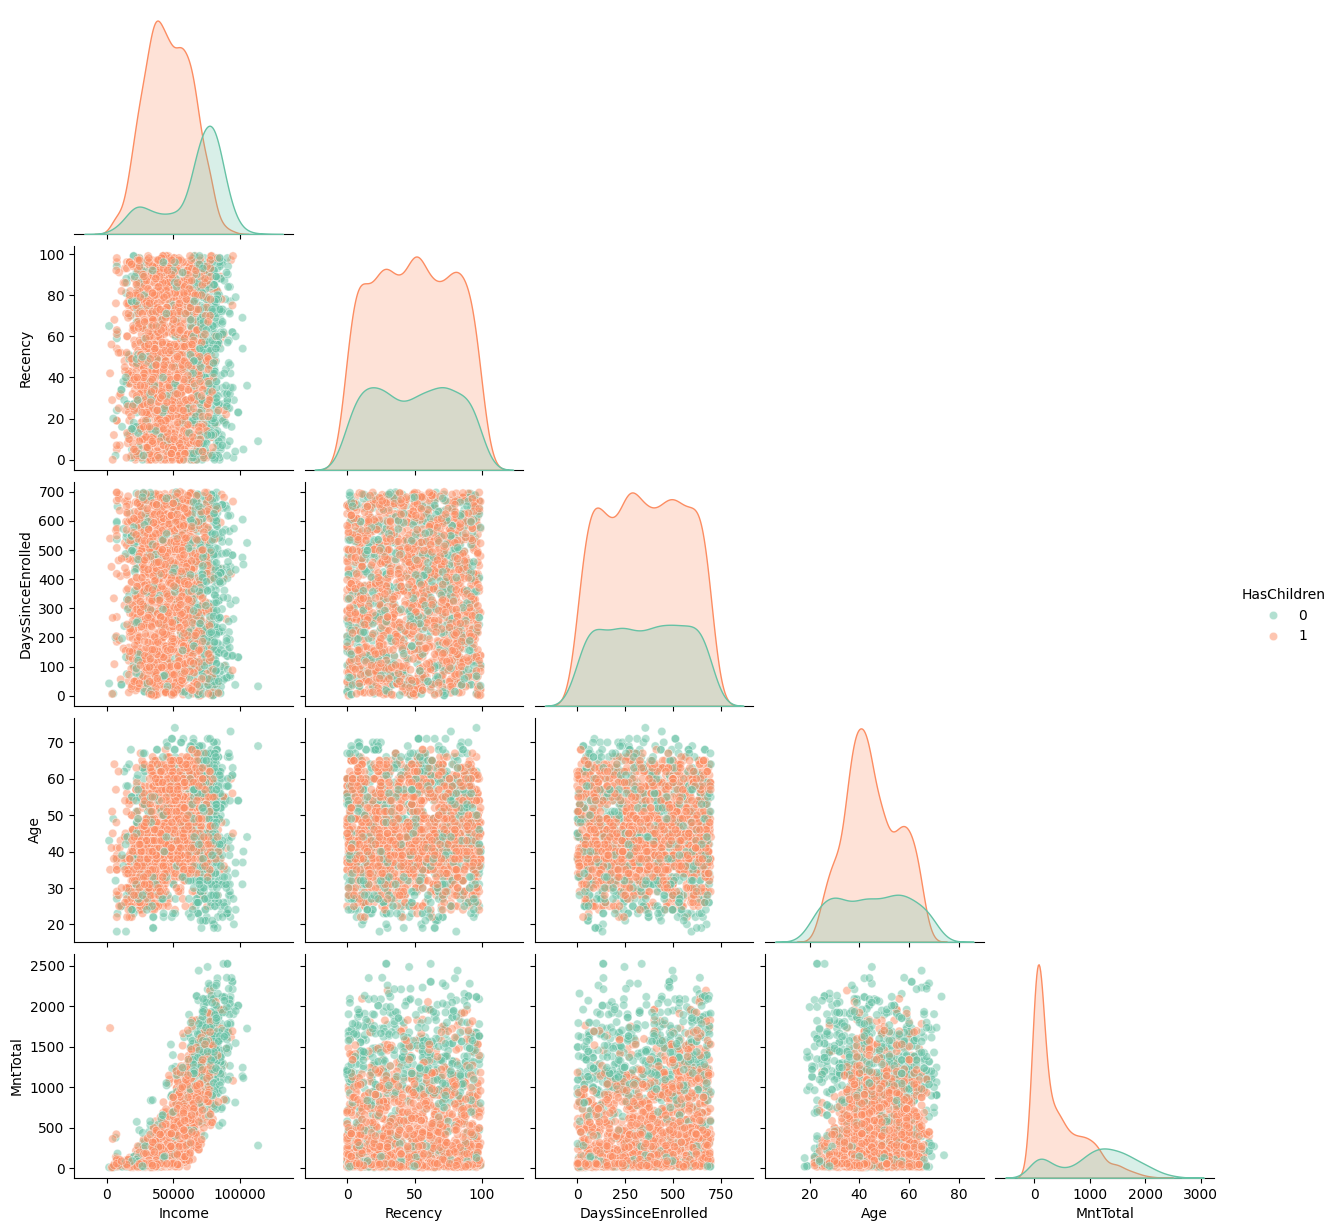

In [ ]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
    ]

pairplot(df,columns_analysis,"HasChildren");

Algumas observações identificadas nos gráficos em relação a cliente com ou sem filhos

- Pessoas sem filhos possuem um renda maior.
- Identifiquei que pessoas com filhos tem um pico aos 40 anos.
- Referente o valor que os clientes gastaram no total, clientes que não tem filhos tem um pico para valores mais elevados.
- Existe uma grande correlação entre renda e gasto total, confirmando que os clientes com maiores rendas e que mais gastam não possuem filhos.


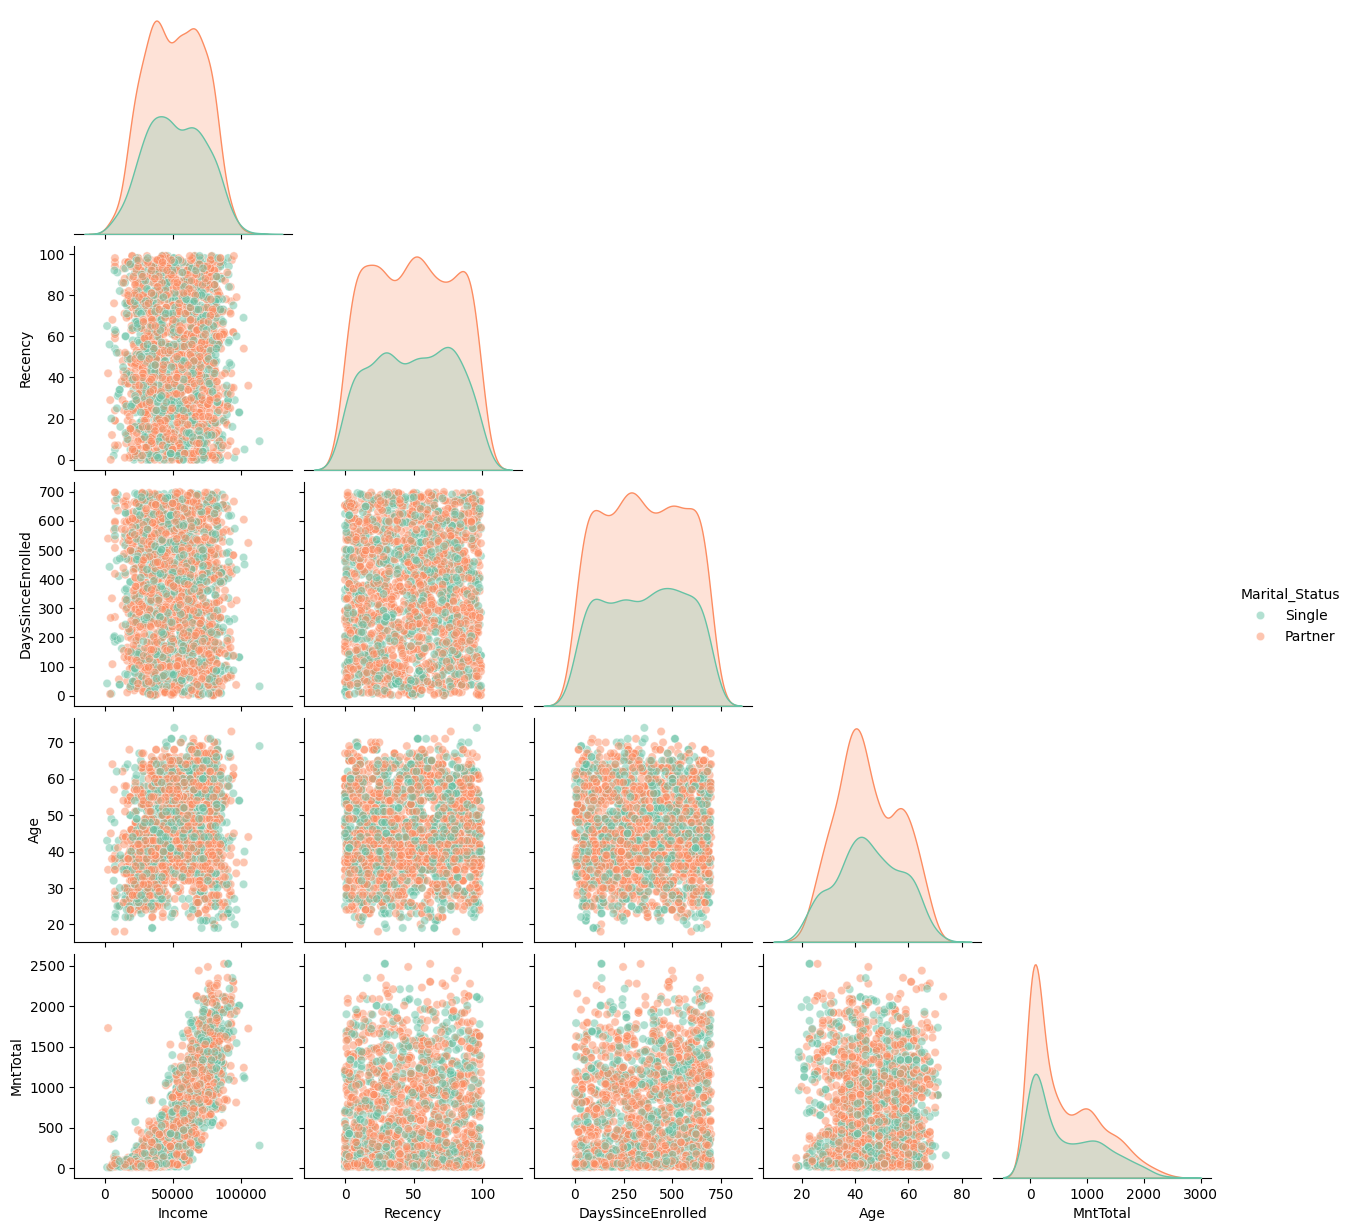

In [ ]:
# Verificando os graficos em relação ao Status Civil
pairplot(df,columns_analysis,"Marital_Status")

Algumas observações identificadas nos gráficos em relação a cliente com ou sem filhos

- Não foi identificado uma grande diferença entre quem tem e quem não tem parceiro.

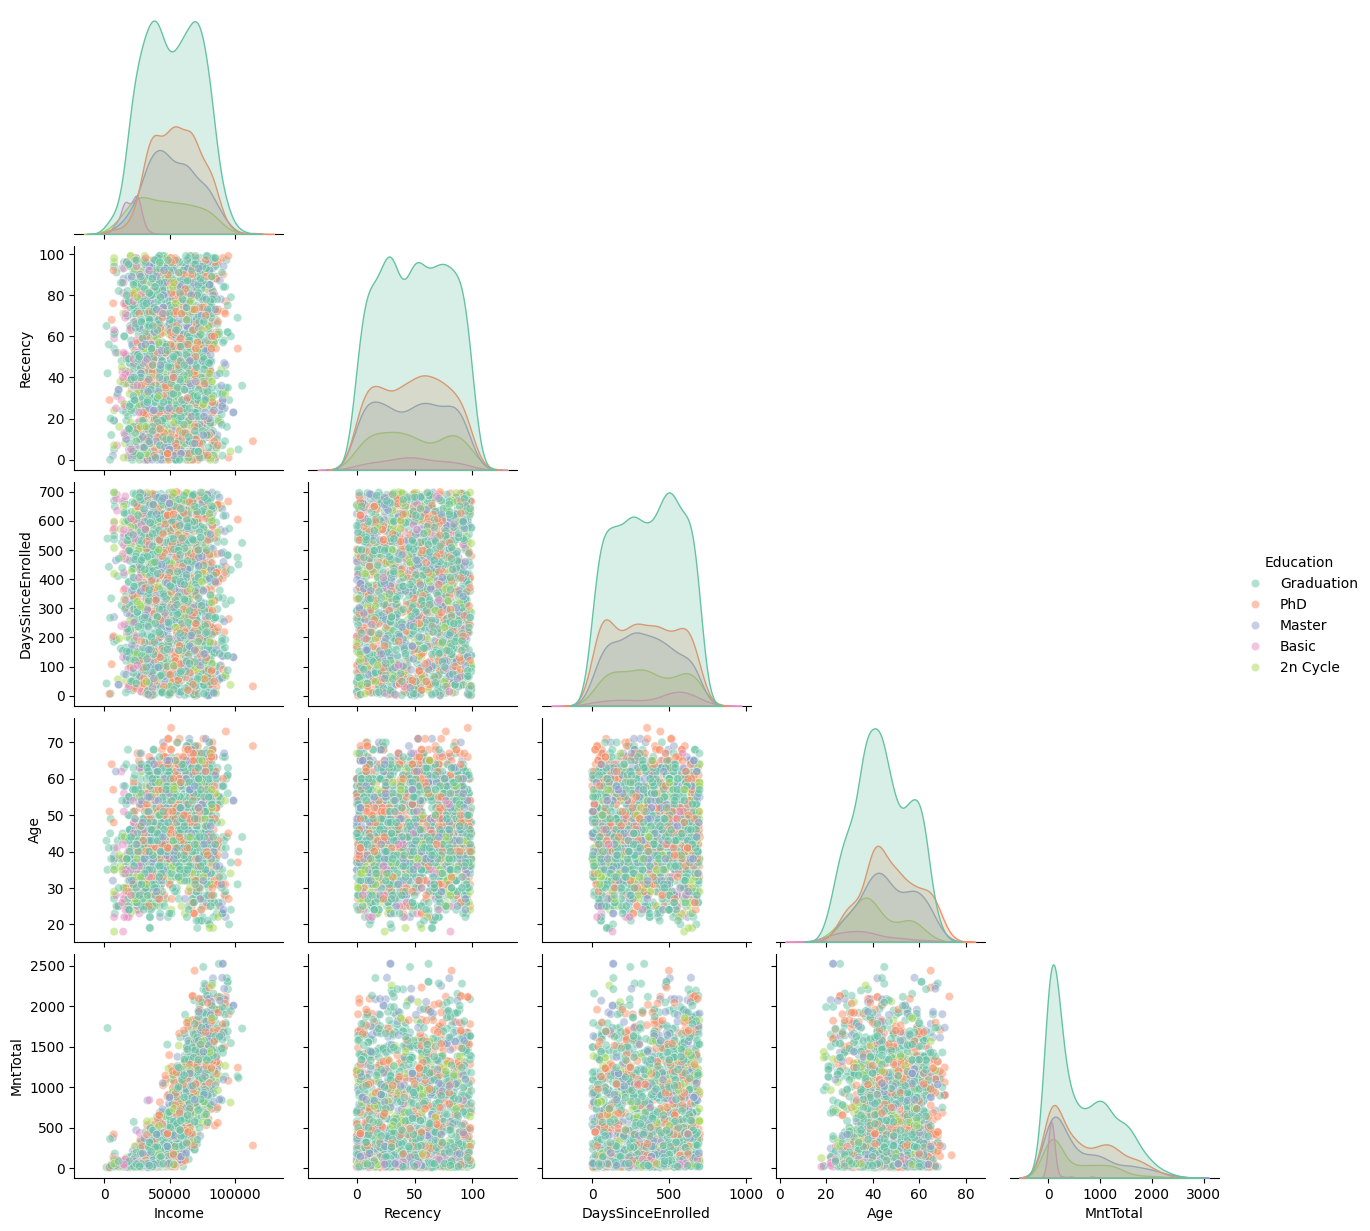

In [ ]:
# Verificando os graficos em relação a Educação
pairplot(df,columns_analysis,"Education")

- Graduação é metade da base, então faz sentido ela aparecer com maiores registros.
- Pessoas com ensino básico tem a menor renda.
- Quando maior a gradução, tende a maior renda e gasto.
- Pessoas com educação básica está bem centrada ao gasto 0, sendo os que menos gastam.

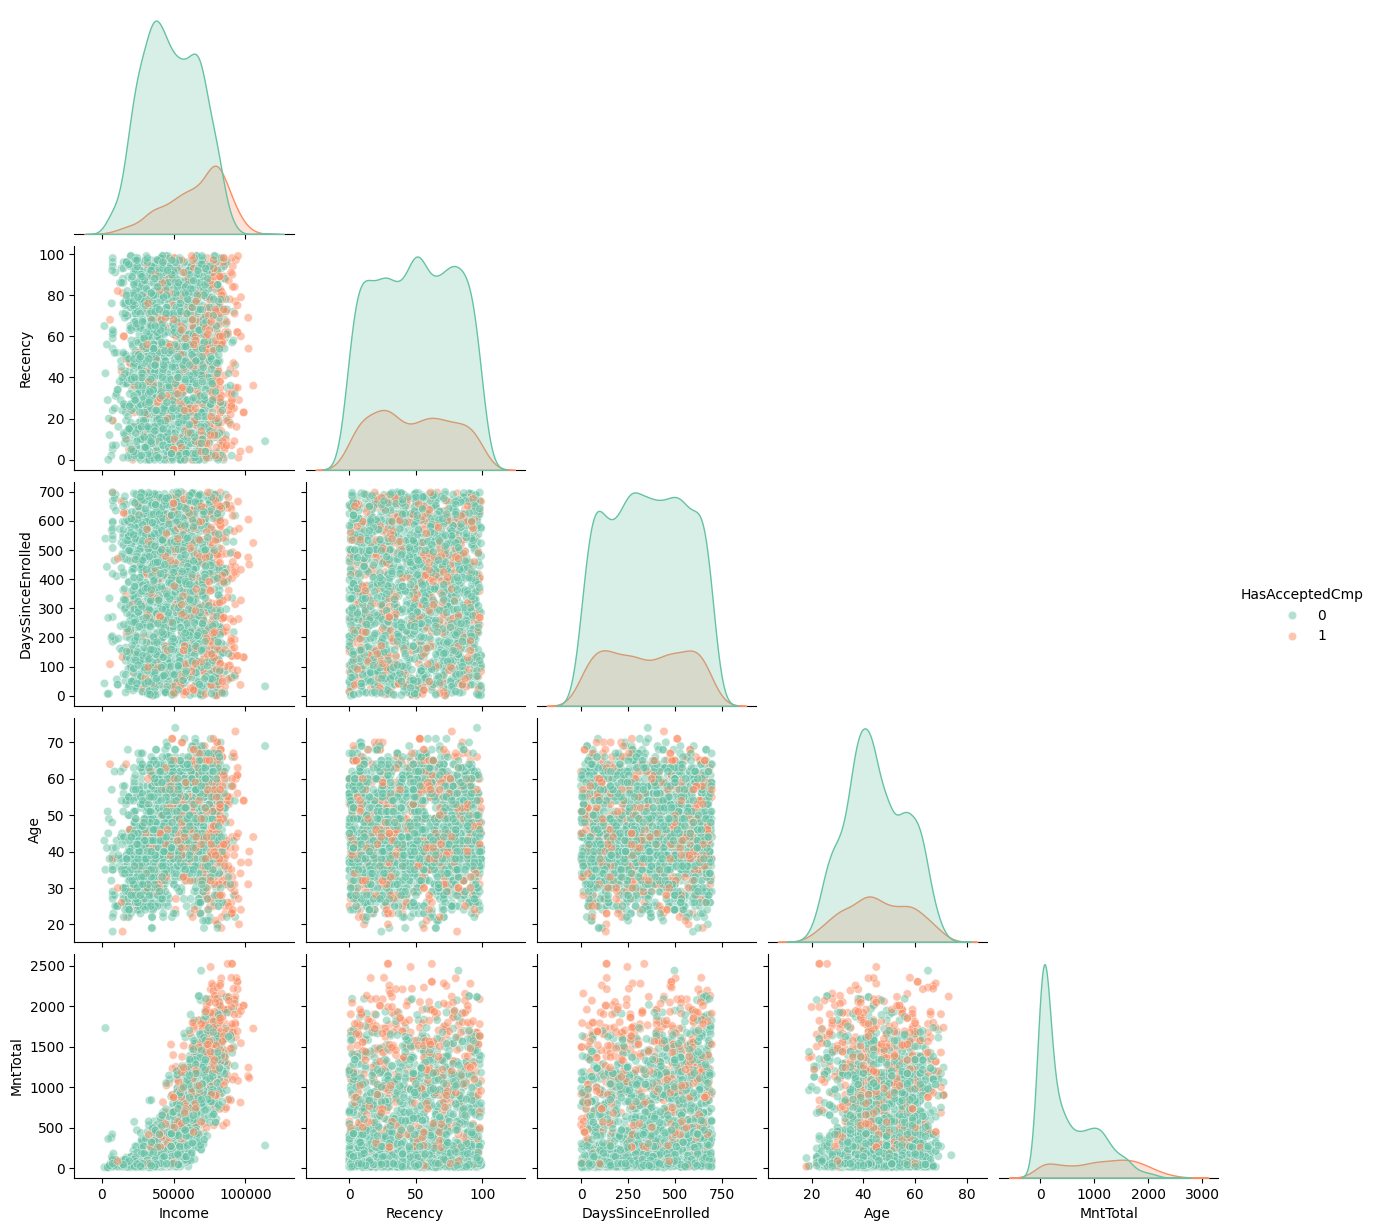

In [ ]:
# Verificando os graficos em relação a aceitação em campanhas
pairplot(df,columns_analysis,"HasAcceptedCmp")

- Em relação a renda, cliente com maiores rendas tendem a aceitar campanhas de market.
- Em relação a idade, temos dois picos entre 40 e 60 anos.

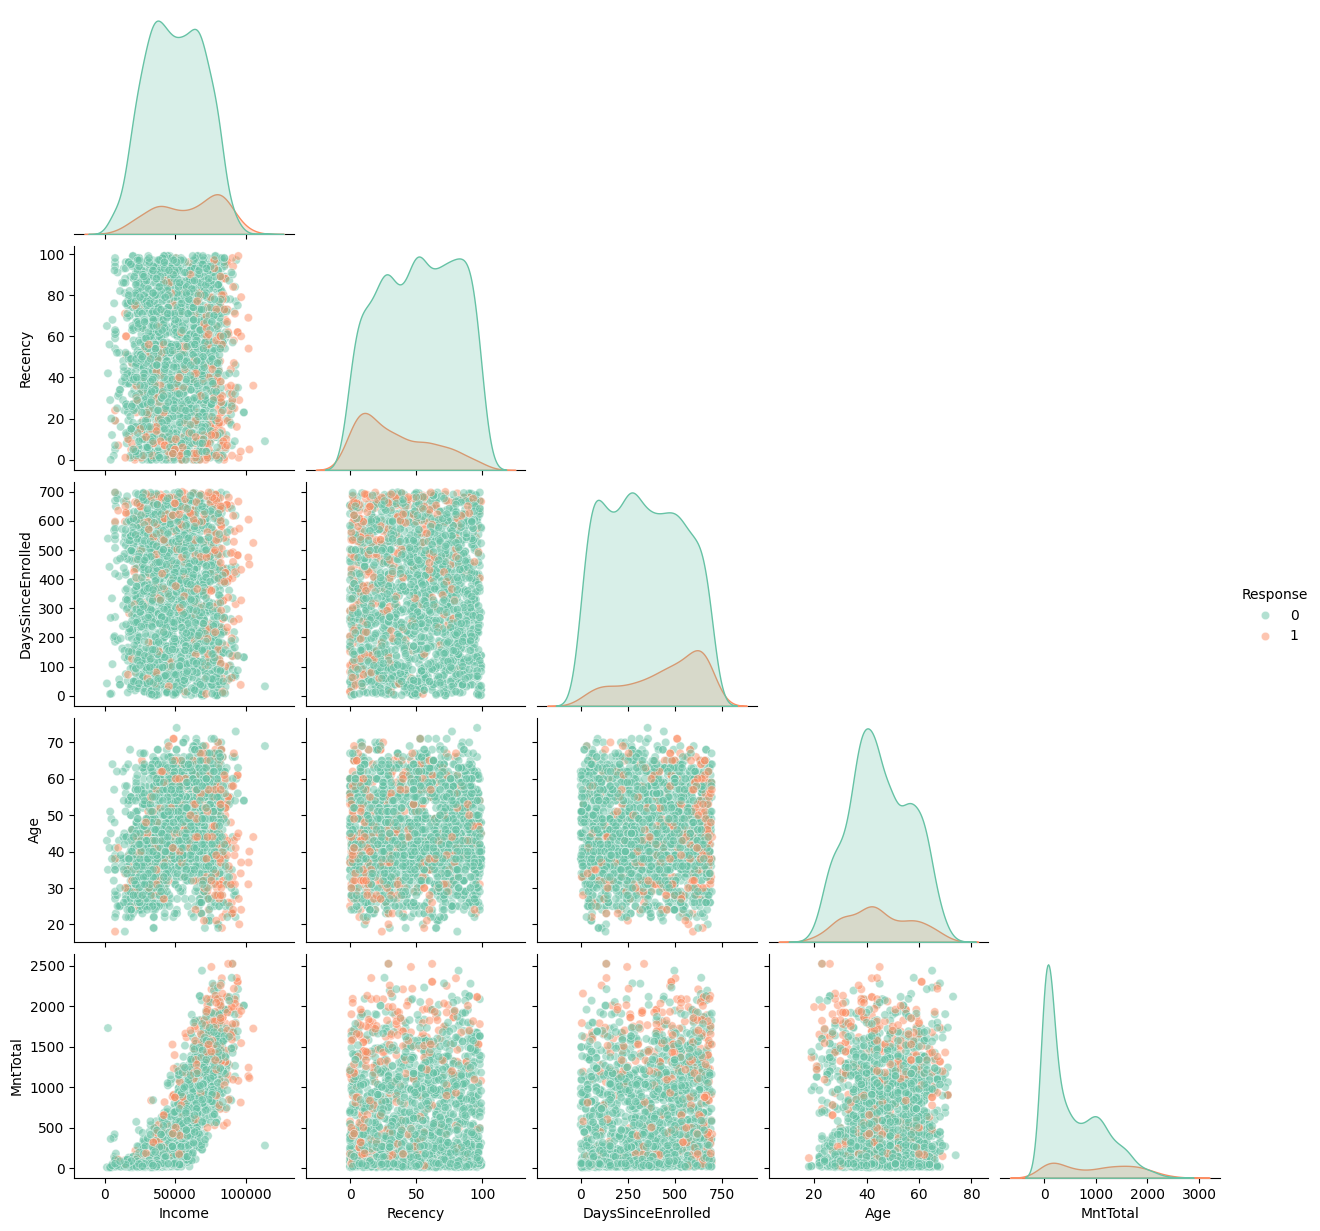

In [ ]:
# Verificando os graficos em relação a aceitação em campanhas (1 se o cliente aceitou a oferta na última campanha (piloto), 0 caso contrário (*target*))
pairplot(df,columns_analysis,"Response")

- Como visto anterioremente a tendência em aceitar campanhas de marketing é superior em quem tem renda superior.
- Clientes mais recentes responderam bem a essa campanha piloto, pessoas que estão acostumadas a realizar compras estão mais favoráveis a aceitar.

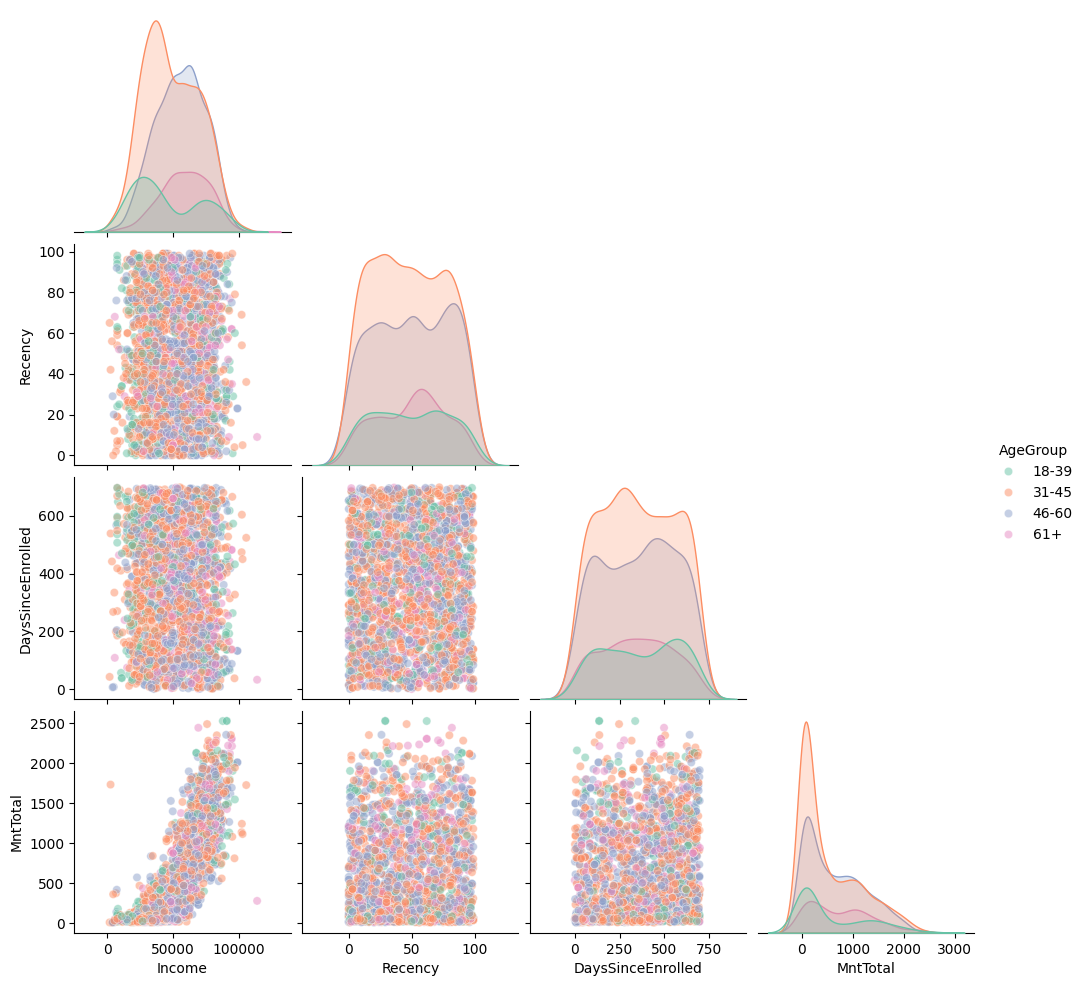

In [ ]:
# Verificando os graficos em relação a coluna criada sobre idades
columns_analysis_sem_idade = [
     "Income",
    "Recency",
    "DaysSinceEnrolled",
    "MntTotal"
]
pairplot(df,columns_analysis_sem_idade,"AgeGroup")

- Pessoas com mais idade tendem a ter um renda superior, porém no grupo mais jovem temos dois picos, um deles sendo em valores mais altos.

/tmp/ipython-input-53-2812809831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="Income", data=df, showmeans=True,palette="Reds");


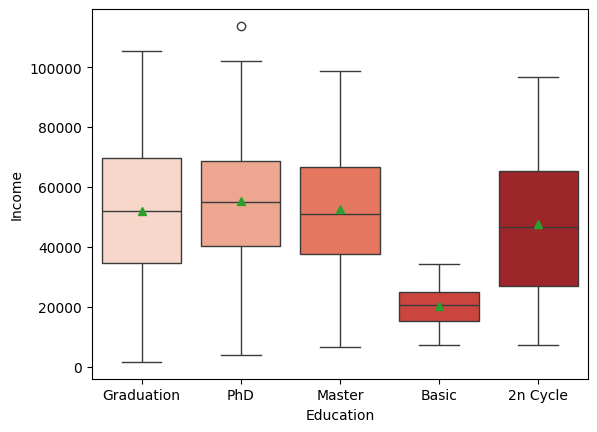

In [ ]:
# Verificando um pouco mais no detalhe a relação de educação e renda
sns.boxplot(x="Education", y="Income", data=df, showmeans=True,palette="Reds");

- Podemos observar que pessoas com o nível de Educação básico realmente um o poder aquisitivo bem abaixo.
- Pessoas com gradução, phd e Mater possuem uma média bem próxima de poder de compra, porém phd tem outliers acima do limite superior.

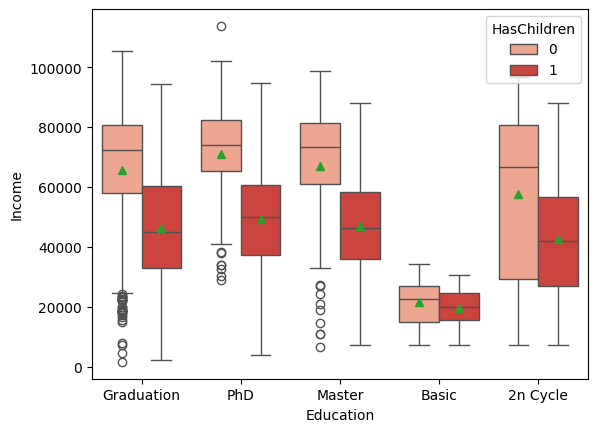

In [ ]:
# Analisando o mesmo grupo, porém no detalhe de dependentes
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="HasChildren",palette="Reds");

- Ao verificar mais no detalhe esse grupo em relação a dependentes, percebe-se que quando eles tem dependentes a mediana, media e valores de renda caem bruscamente.

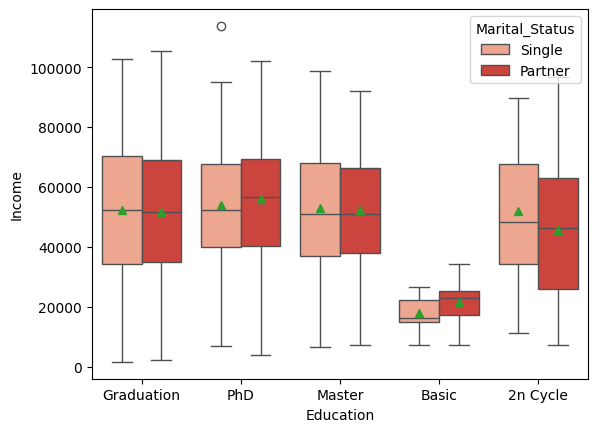

In [ ]:
# Analisando o mesmo grupo, porém no detalhe de status civil
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="Marital_Status",palette="Reds");

- De uma maneira geral não temos uma grande diferença, um pequeno peso no phd, onde quem tem parceiros possuem uma mediana um pouco maior.

/tmp/ipython-input-56-2573167365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="MntRegularProds", data=df, showmeans=True,palette="Reds");


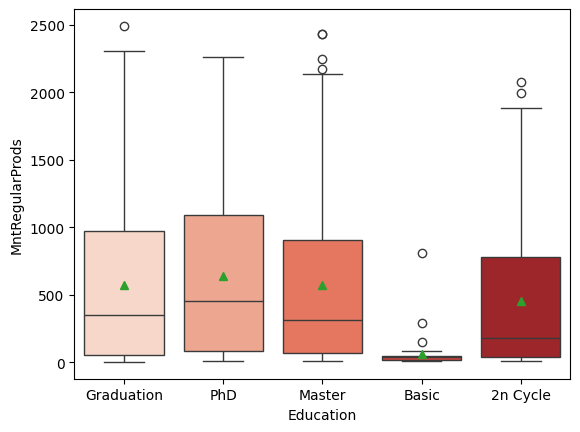

In [ ]:
# Analisando a relação entre educação e o consumo de produtos regulares
sns.boxplot(x="Education", y="MntRegularProds", data=df, showmeans=True,palette="Reds");

/tmp/ipython-input-57-2044258420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="MntGoldProds", data=df, showmeans=True,palette="Reds");


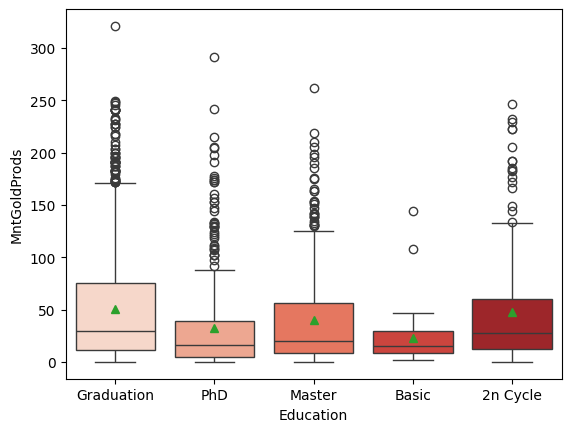

In [ ]:
# Analisando a relação entre educação e o consumo de produtos gold
sns.boxplot(x="Education", y="MntGoldProds", data=df, showmeans=True,palette="Reds");

- Aqui temos um situação interessantes, pessoas com phd tendem a ter uma mediana maior que os outros níveis de educação para produtos regulares, porém se inverte nos produtos gold.

/tmp/ipython-input-58-3826211894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeGroup", y="MntRegularProds", data=df, showmeans=True,palette="Reds");


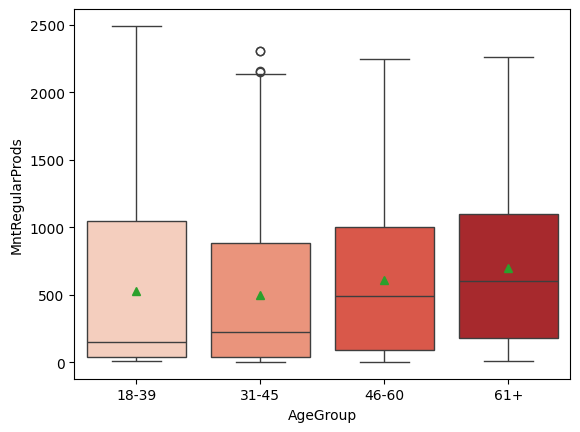

In [ ]:
# Analisando a relação entre idade e o consumo de produtos regulares
sns.boxplot(x="AgeGroup", y="MntRegularProds", data=df, showmeans=True,palette="Reds");

/tmp/ipython-input-59-526288607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeGroup", y="MntGoldProds", data=df, showmeans=True,palette="Reds");


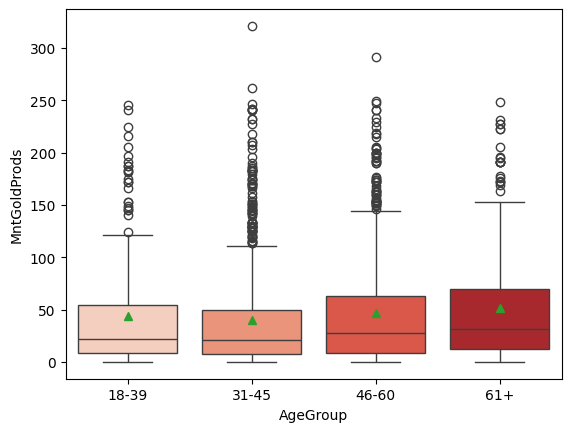

In [ ]:
# Analisando a relação entre idade e o consumo de produtos gold
sns.boxplot(x="AgeGroup", y="MntGoldProds", data=df, showmeans=True,palette="Reds");

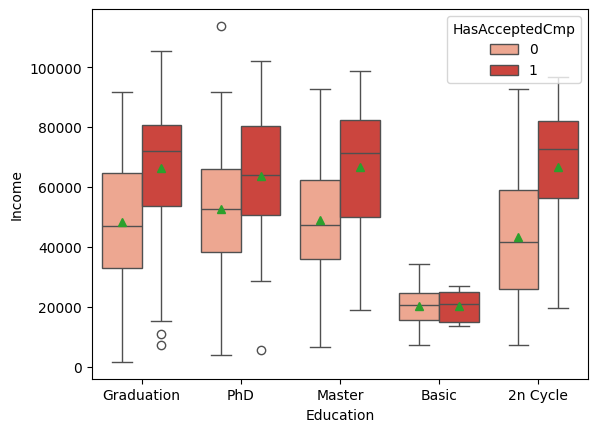

In [ ]:
# Analisando a aceitação de campanhas
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="HasAcceptedCmp",palette="Reds"),;

- Conseguimos confirmar que quem realmente converteu em alguma das campanhas realmente tendem a ter a renda superior em cada grupo.

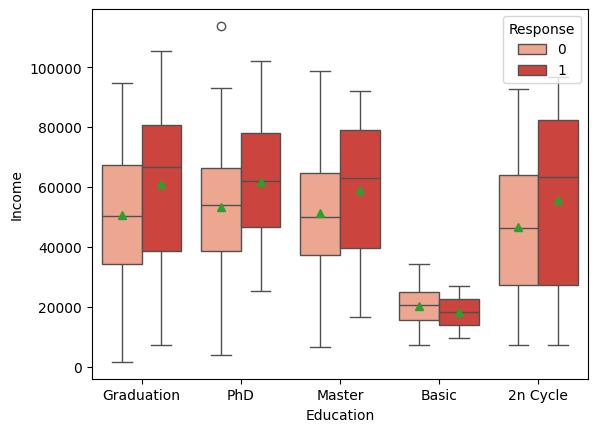

In [ ]:
# Analisando a aceitação de campanha piloto
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="Response",palette="Reds");

- Identificamos o mesmo padrão porém com diferenças menores.

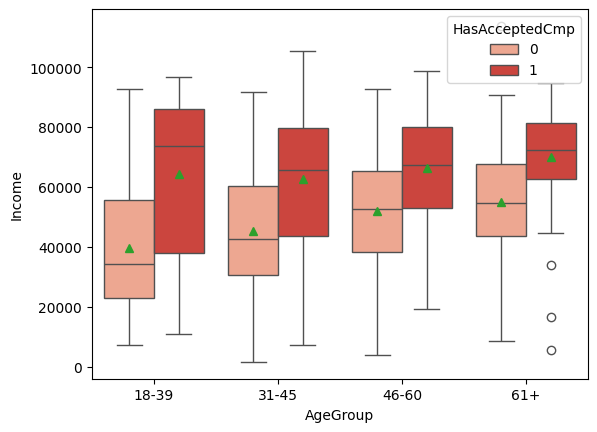

In [ ]:
# Analisando a aceitação de campanhas em relação a idade
sns.boxplot(x="AgeGroup", y="Income", data=df, showmeans=True, hue="HasAcceptedCmp",palette="Reds");

# Conclusão

A análise e pré-processamento do dataset Ifood demonstram a importância fundamental de uma compreensão aprofundada da base de dados antes da construção de qualquer modelo preditivo. Este projeto focou em realizar um entendimento robusto e o tratamento inicial dos dados, visando um problema de classificação supervisionada: prever a adesão de clientes a campanhas de marketing direto. A exploração dos dados revelou padrões relevantes entre características demográficas e comportamento de consumo, destacando, por exemplo, a influência da idade, renda e composição familiar na adesão às campanhas.
Através da análise exploratória de dados (EDA), foi possível mapear a estrutura do dataset, que contém informações sociodemográficas, firmográficas, de consumo e o histórico de resposta à campanha de 2.240 clientes. Essa etapa foi crucial para identificar padrões, verificar a qualidade dos dados e preparar o terreno para a modelagem futura.

As três hipóteses levantadas foram validadas:

- O cliente possuir dependentes intefere na quantidade de produtos que ele consome? Foi criada uma variável `HasChildren` para identificar se o cliente possui dependentes. A análise incluiu visualizações (como gráficos de pizza) e comparações entre clientes com e sem dependentes. Observou-se que clientes com dependentes tendem a consumir levemente mais produtos do que os que não possuem, mas a diferença não é tão expressiva. Portanto, há uma influência, mas ela não é determinante isoladamente.

- Existe uma correlação entre nível de escolaridade e adesão em campanhas?

- A idade interfere no consumo? Resposta: A variável `Age` foi criada e analisada. As visualizações demonstraram que clientes em faixas etárias médias (aproximadamente de 35 a 55 anos) possuem maior consumo, tanto em quantidade de produtos quanto em valor. Já clientes muito jovens e muito idosos tendem a consumir menos. Portanto, há uma relação direta e significativa entre idade e consumo.